<a href="https://colab.research.google.com/github/Shosh3sb/computer_vision_512/blob/main/GAN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the input images to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert the input images to grayscale
x_train_gray = np.dot(x_train, [0.2989, 0.5870, 0.1140])
x_test_gray = np.dot(x_test, [0.2989, 0.5870, 0.1140])

# Reshape the input images to 32x32x1
x_train_gray = np.reshape(x_train_gray, (len(x_train_gray), 32, 32, 1))
x_test_gray = np.reshape(x_test_gray, (len(x_test_gray), 32, 32, 1))


170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Generator function
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 256)))
    assert model.output_shape == (None, 8, 8, 256)

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 8, 8, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 32, 32, 3)

    return model

# Discriminator function
def make_discriminator_model():
    model = tf.keras.Sequential()

    # Input layer
    model.add(layers.Input(shape=(32, 32, 3)))

    # Conv2D layers
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.3))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(1))

    return model


# GAN function
def make_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Create the generator and discriminator models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Compile the discriminator model
discriminator.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

# Create the GAN model
gan = make_gan(generator, discriminator)

# Compile the GAN model
gan.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=tf.keras.losses.BinaryCrossentropy(from_logits=True))

# Train the GAN model
# ... add code here to prepare data and train the GAN ...


In [ ]:
#generator.load_weights('generator_weights.h5')
# Set the batch size and number of epochs
batch_size = 128
epochs = 200

# Create a function to generate noise vectors for the generator
def generate_noise(batch_size, noise_dim):
    return tf.random.normal([batch_size, noise_dim])

# Define the number of steps to take for each epoch
steps_per_epoch = x_train.shape[0] // batch_size

# Train the GAN model
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    if (epoch > 0 and epoch % 10 ==0):
        generator.save('generator_model.h5')
        print("saved")

    # Shuffle the data
    np.random.shuffle(x_train)

    # Loop over batches of data
    for step in range(steps_per_epoch):
        # Sample a batch of real images
        real_images = x_train[step * batch_size:(step + 1) * batch_size]

        # Generate a batch of fake images
        noise = generate_noise(batch_size, 100)
        fake_images = generator.predict(noise)

        # Train the discriminator on real and fake images
        discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
        discriminator_loss = 0.5 * (discriminator_loss_real + discriminator_loss_fake)

        # Train the generator to fool the discriminator
        noise = generate_noise(batch_size, 100)
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
        if (step % 10 == 0):
        # Print the losses for this step
          print(f"Step {step+1}/{steps_per_epoch} - D loss: {discriminator_loss:.4f}, G loss: {generator_loss:.4f}")


Epoch 1/200
4/4 [==============================] - 8s 5ms/step
Step 1/390 - D loss: 1.8587, G loss: 0.3877
4/4 [==============================] - 0s 3ms/step
Step 11/390 - D loss: 0.3544, G loss: 1.8127
4/4 [==============================] - 0s 3ms/step
Step 21/390 - D loss: 0.2207, G loss: 0.5838
4/4 [==============================] - 0s 3ms/step
Step 31/390 - D loss: 0.0684, G loss: 0.0843
4/4 [==============================] - 0s 3ms/step
Step 41/390 - D loss: 0.0079, G loss: 0.0024
4/4 [==============================] - 0s 3ms/step
Step 51/390 - D loss: 0.0042, G loss: 0.0005
4/4 [==============================] - 0s 3ms/step
Step 61/390 - D loss: 0.0011, G loss: 0.0003
4/4 [==============================] - 0s 3ms/step
Step 71/390 - D loss: 0.0008, G loss: 0.0002
4/4 [==============================] - 0s 3ms/step
Step 81/390 - D loss: 0.0005, G loss: 0.0003
4/4 [==============================] - 0s 3ms/step
Step 91/390 - D loss: 0.0002, G loss: 0.0004
4/4 [========================

Epoch 11/200
saved
4/4 [==============================] - 0s 3ms/step
Step 1/390 - D loss: 0.0627, G loss: 3.2679
4/4 [==============================] - 0s 4ms/step
Step 11/390 - D loss: 0.0107, G loss: 0.0647
4/4 [==============================] - 0s 4ms/step
Step 21/390 - D loss: 0.0014, G loss: 0.0019
4/4 [==============================] - 0s 4ms/step
Step 31/390 - D loss: 0.0035, G loss: 0.0006
4/4 [==============================] - 0s 5ms/step
Step 41/390 - D loss: 0.0006, G loss: 0.0008
4/4 [==============================] - 0s 4ms/step
Step 51/390 - D loss: 0.0024, G loss: 0.0018
4/4 [==============================] - 0s 4ms/step
Step 61/390 - D loss: 0.0022, G loss: 0.0025
4/4 [==============================] - 0s 5ms/step
Step 71/390 - D loss: 0.0012, G loss: 0.0032
4/4 [==============================] - 0s 5ms/step
Step 81/390 - D loss: 0.0017, G loss: 0.0078
4/4 [==============================] - 0s 3ms/step
Step 91/390 - D loss: 0.0022, G loss: 0.0113
4/4 [=================

Epoch 21/200
saved
4/4 [==============================] - 0s 3ms/step
Step 1/390 - D loss: 0.0157, G loss: 0.0158
4/4 [==============================] - 0s 4ms/step
Step 11/390 - D loss: 0.0083, G loss: 0.0307
4/4 [==============================] - 0s 3ms/step
Step 21/390 - D loss: 0.0033, G loss: 0.0429
4/4 [==============================] - 0s 3ms/step
Step 31/390 - D loss: 0.0199, G loss: 1.3115
4/4 [==============================] - 0s 5ms/step
Step 41/390 - D loss: 0.1757, G loss: 4.1747
4/4 [==============================] - 0s 5ms/step
Step 51/390 - D loss: 0.0592, G loss: 4.5255
4/4 [==============================] - 0s 4ms/step
Step 61/390 - D loss: 0.0374, G loss: 3.7708
4/4 [==============================] - 0s 3ms/step
Step 71/390 - D loss: 0.0498, G loss: 3.4507
4/4 [==============================] - 0s 3ms/step
Step 81/390 - D loss: 0.0479, G loss: 2.9078
4/4 [==============================] - 0s 4ms/step
Step 91/390 - D loss: 0.0455, G loss: 3.4993
4/4 [=================

Epoch 31/200
saved
4/4 [==============================] - 0s 3ms/step
Step 1/390 - D loss: 0.0015, G loss: 0.0020
4/4 [==============================] - 0s 3ms/step
Step 11/390 - D loss: 0.0010, G loss: 0.0024
4/4 [==============================] - 0s 5ms/step
Step 21/390 - D loss: 0.0004, G loss: 0.0032
4/4 [==============================] - 0s 3ms/step
Step 31/390 - D loss: 0.0004, G loss: 0.0048
4/4 [==============================] - 0s 5ms/step
Step 41/390 - D loss: 0.0004, G loss: 0.0034
4/4 [==============================] - 0s 6ms/step
Step 51/390 - D loss: 0.0017, G loss: 0.0013
4/4 [==============================] - 0s 4ms/step
Step 61/390 - D loss: 0.0008, G loss: 0.0071
4/4 [==============================] - 0s 6ms/step
Step 71/390 - D loss: 0.0009, G loss: 0.0084
4/4 [==============================] - 0s 3ms/step
Step 81/390 - D loss: 0.0005, G loss: 0.0032
4/4 [==============================] - 0s 4ms/step
Step 91/390 - D loss: 0.0148, G loss: 0.0004
4/4 [=================

Epoch 41/200
saved
4/4 [==============================] - 0s 3ms/step
Step 1/390 - D loss: 0.0033, G loss: 0.0727
4/4 [==============================] - 0s 5ms/step
Step 11/390 - D loss: 0.0045, G loss: 0.0473
4/4 [==============================] - 0s 7ms/step
Step 21/390 - D loss: 0.0186, G loss: 0.0499
4/4 [==============================] - 0s 8ms/step
Step 31/390 - D loss: 0.0025, G loss: 0.0690
4/4 [==============================] - 0s 4ms/step
Step 41/390 - D loss: 0.0062, G loss: 0.0282
4/4 [==============================] - 0s 4ms/step
Step 51/390 - D loss: 0.0133, G loss: 0.0058
4/4 [==============================] - 0s 3ms/step
Step 61/390 - D loss: 0.0003, G loss: 0.0453
4/4 [==============================] - 0s 7ms/step
Step 71/390 - D loss: 0.0004, G loss: 0.0201
4/4 [==============================] - 0s 6ms/step
Step 81/390 - D loss: 0.0089, G loss: 0.0159
4/4 [==============================] - 0s 4ms/step
Step 91/390 - D loss: 0.0059, G loss: 0.0110
4/4 [=================

Epoch 51/200
saved
4/4 [==============================] - 0s 4ms/step
Step 1/390 - D loss: 0.0022, G loss: 0.0003
4/4 [==============================] - 0s 8ms/step
Step 11/390 - D loss: 0.0044, G loss: 0.0016
4/4 [==============================] - 0s 7ms/step
Step 21/390 - D loss: 0.0008, G loss: 0.0377
4/4 [==============================] - 0s 4ms/step
Step 31/390 - D loss: 0.0021, G loss: 0.0908
4/4 [==============================] - 0s 6ms/step
Step 41/390 - D loss: 0.0822, G loss: 0.0534
4/4 [==============================] - 0s 6ms/step
Step 51/390 - D loss: 0.0580, G loss: 0.0577
4/4 [==============================] - 0s 3ms/step
Step 61/390 - D loss: 0.3387, G loss: 0.9305
4/4 [==============================] - 0s 4ms/step
Step 71/390 - D loss: 0.0131, G loss: 0.0137
4/4 [==============================] - 0s 6ms/step
Step 81/390 - D loss: 0.0099, G loss: 0.0041
4/4 [==============================] - 0s 5ms/step
Step 91/390 - D loss: 0.0009, G loss: 0.0184
4/4 [=================

Epoch 61/200
saved
4/4 [==============================] - 0s 6ms/step
Step 1/390 - D loss: 0.0011, G loss: 2.1032
4/4 [==============================] - 0s 7ms/step
Step 11/390 - D loss: 0.0009, G loss: 0.0146
4/4 [==============================] - 0s 5ms/step
Step 21/390 - D loss: 0.0019, G loss: 0.0521
4/4 [==============================] - 0s 4ms/step
Step 31/390 - D loss: 0.0024, G loss: 0.2298
4/4 [==============================] - 0s 4ms/step
Step 41/390 - D loss: 0.0036, G loss: 2.4543
4/4 [==============================] - 0s 3ms/step
Step 51/390 - D loss: 0.0052, G loss: 0.2264
4/4 [==============================] - 0s 6ms/step
Step 61/390 - D loss: 0.0042, G loss: 7.2089
4/4 [==============================] - 0s 6ms/step
Step 71/390 - D loss: 0.0018, G loss: 0.2740
4/4 [==============================] - 0s 3ms/step
Step 81/390 - D loss: 0.0036, G loss: 0.0613
4/4 [==============================] - 0s 4ms/step
Step 91/390 - D loss: 0.0049, G loss: 0.0025
4/4 [=================

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 374ms/step


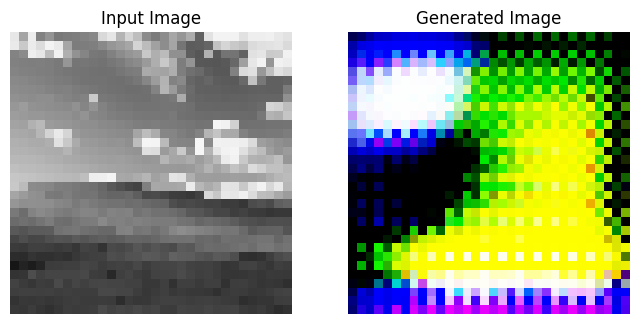

In [ ]:
import cv2
import matplotlib.pyplot as plt
# Load a sample input image
img_path = 'bliss.png'
input_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
input_image = cv2.resize(input_image, (32, 32))
input_image = input_image.astype('float32') / 255.0
input_image = np.expand_dims(input_image, axis=-1)
input_image = tf.stack([input_image[:, :, :]]*3, axis=-1)

# Generate an output image using the trained GAN model
noise = generate_noise(1, 100)
generated_image = generator.predict(noise)

# Display the input and output images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(input_image[:, :, 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(generated_image[0, :, :, :], cmap='gray')
plt.title('Generated Image')
plt.axis('off')
plt.show()


In [ ]:
# Save the generator model
generator.save('generator_model.h5')
